# Welcome to TTCS - Technion Text Column Summarization tool.

   ## Supervisor:
        - Professor Benny Kimelfeld
            Email: bennyk@cs.technion.ac.il

   ## Developers:
        - Omar Jaml
            Email: omar.jaml.96@gmail.com
        - Samah Anabusy
            Email: mousy.on@gmail.com


In [1]:
from stopword import clear_stopwords
from nltk.corpus import  wordnet
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [2]:
print("Please enter the name of the Dataset:\n")

Please enter the name of the Dataset:



In [3]:
dataset_name = input()
dsf = pd.read_csv(dataset_name)

dataset130.csv


In [4]:
dsf

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,taster_name,taster_twitter_handle,title,variety,winery
0,0,Italy,"Aromas include tropical fruit, broom, brimston...",Vulkà Bianco,87,NaN,Sicily & Sardinia,Etna,NaN,Kerin O’Keefe,@kerinokeefe,Nicosia 2013 Vulkà Bianco (Etna),White Blend,Nicosia
1,1,Portugal,"This is ripe and fruity, a wine that is smooth...",Avidagos,87,15.0,Douro,NaN,NaN,Roger Voss,@vossroger,Quinta dos Avidagos 2011 Avidagos Red (Douro),Portuguese Red,Quinta dos Avidagos
2,2,US,"Tart and snappy, the flavors of lime flesh and...",NaN,87,14.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Rainstorm 2013 Pinot Gris (Willamette Valley),Pinot Gris,Rainstorm
3,3,US,"Pineapple rind, lemon pith and orange blossom ...",Reserve Late Harvest,87,13.0,Michigan,Lake Michigan Shore,NaN,Alexander Peartree,NaN,St. Julian 2013 Reserve Late Harvest Riesling ...,Riesling,St. Julian
4,4,US,"Much like the regular bottling from 2012, this...",Vintner's Reserve Wild Child Block,87,65.0,Oregon,Willamette Valley,Willamette Valley,Paul Gregutt,@paulgwine,Sweet Cheeks 2012 Vintner's Reserve Wild Child...,Pinot Noir,Sweet Cheeks
5,5,Spain,Blackberry and raspberry aromas show a typical...,Ars In Vitro,87,15.0,Northern Spain,Navarra,NaN,Michael Schachner,@wineschach,Tandem 2011 Ars In Vitro Tempranillo-Merlot (N...,Tempranillo-Merlot,Tandem
6,6,Italy,"Here's a bright, informal red that opens with ...",Belsito,87,16.0,Sicily & Sardinia,Vittoria,NaN,Kerin O’Keefe,@kerinokeefe,Terre di Giurfo 2013 Belsito Frappato (Vittoria),Frappato,Terre di Giurfo
7,7,France,This dry and restrained wine offers spice in p...,NaN,87,24.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Trimbach 2012 Gewurztraminer (Alsace),Gewürztraminer,Trimbach
8,8,Germany,Savory dried thyme notes accent sunnier flavor...,Shine,87,12.0,Rheinhessen,NaN,NaN,Anna Lee C. Iijima,NaN,Heinz Eifel 2013 Shine Gewürztraminer (Rheinhe...,Gewürztraminer,Heinz Eifel
9,9,France,This has great depth of flavor with its fresh ...,Les Natures,87,27.0,Alsace,Alsace,NaN,Roger Voss,@vossroger,Jean-Baptiste Adam 2012 Les Natures Pinot Gris...,Pinot Gris,Jean-Baptiste Adam


In [5]:
column_text = dsf['description']
column_text = column_text[:100]

In [6]:
for (i,x) in enumerate(column_text):
     print(i+1,'\t', x + '\n')

1 	 Aromas include tropical fruit, broom, brimstone and dried herb. The palate isn't overly expressive, offering unripened apple, citrus and dried sage alongside brisk acidity.

2 	 This is ripe and fruity, a wine that is smooth while still structured. Firm tannins are filled out with juicy red berry fruits and freshened with acidity. It's  already drinkable, although it will certainly be better from 2016.

3 	 Tart and snappy, the flavors of lime flesh and rind dominate. Some green pineapple pokes through, with crisp acidity underscoring the flavors. The wine was all stainless-steel fermented.

4 	 Pineapple rind, lemon pith and orange blossom start off the aromas. The palate is a bit more opulent, with notes of honey-drizzled guava and mango giving way to a slightly astringent, semidry finish.

5 	 Much like the regular bottling from 2012, this comes across as rather rough and tannic, with rustic, earthy, herbal characteristics. Nonetheless, if you think of it as a pleasantly unfussy

In [7]:
text = " ".join(r for r in column_text)
text = text.lower()

stop_words = set(stopwords.words('english'))
word_tokens = word_tokenize(text)
filtered_sentence = [w for w in word_tokens if w not in stop_words]

In [8]:
print(filtered_sentence)

['aromas', 'include', 'tropical', 'fruit', ',', 'broom', ',', 'brimstone', 'dried', 'herb', '.', 'palate', "n't", 'overly', 'expressive', ',', 'offering', 'unripened', 'apple', ',', 'citrus', 'dried', 'sage', 'alongside', 'brisk', 'acidity', '.', 'ripe', 'fruity', ',', 'wine', 'smooth', 'still', 'structured', '.', 'firm', 'tannins', 'filled', 'juicy', 'red', 'berry', 'fruits', 'freshened', 'acidity', '.', "'s", 'already', 'drinkable', ',', 'although', 'certainly', 'better', '2016.', 'tart', 'snappy', ',', 'flavors', 'lime', 'flesh', 'rind', 'dominate', '.', 'green', 'pineapple', 'pokes', ',', 'crisp', 'acidity', 'underscoring', 'flavors', '.', 'wine', 'stainless-steel', 'fermented', '.', 'pineapple', 'rind', ',', 'lemon', 'pith', 'orange', 'blossom', 'start', 'aromas', '.', 'palate', 'bit', 'opulent', ',', 'notes', 'honey-drizzled', 'guava', 'mango', 'giving', 'way', 'slightly', 'astringent', ',', 'semidry', 'finish', '.', 'much', 'like', 'regular', 'bottling', '2012', ',', 'comes', 'a

In [9]:
import string
table = str.maketrans('', '', string.punctuation)
stripped = [w.translate(table) for w in filtered_sentence]
while '' in stripped: stripped.remove('')
print(stripped)

['aromas', 'include', 'tropical', 'fruit', 'broom', 'brimstone', 'dried', 'herb', 'palate', 'nt', 'overly', 'expressive', 'offering', 'unripened', 'apple', 'citrus', 'dried', 'sage', 'alongside', 'brisk', 'acidity', 'ripe', 'fruity', 'wine', 'smooth', 'still', 'structured', 'firm', 'tannins', 'filled', 'juicy', 'red', 'berry', 'fruits', 'freshened', 'acidity', 's', 'already', 'drinkable', 'although', 'certainly', 'better', '2016', 'tart', 'snappy', 'flavors', 'lime', 'flesh', 'rind', 'dominate', 'green', 'pineapple', 'pokes', 'crisp', 'acidity', 'underscoring', 'flavors', 'wine', 'stainlesssteel', 'fermented', 'pineapple', 'rind', 'lemon', 'pith', 'orange', 'blossom', 'start', 'aromas', 'palate', 'bit', 'opulent', 'notes', 'honeydrizzled', 'guava', 'mango', 'giving', 'way', 'slightly', 'astringent', 'semidry', 'finish', 'much', 'like', 'regular', 'bottling', '2012', 'comes', 'across', 'rather', 'rough', 'tannic', 'rustic', 'earthy', 'herbal', 'characteristics', 'nonetheless', 'think', 

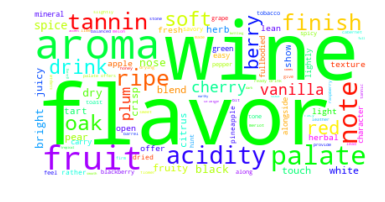

In [10]:
text = " ".join(w for w in stripped)
wordcloud = WordCloud(max_words=100, background_color="white", colormap="gist_rainbow").generate(text)


plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [13]:
def intersection(lst1, lst2):
   return list(set(lst1) & set(lst2))

In [14]:
def getmax(text_l, syns):
    counter_s = 0
    max_str = ""
    for w in syns:
        if text_l.count(w) > counter_s:
            max_str = w
            counter_s = text_l.count(w)
    return max_str

In [15]:
synonyms = []
upd_stripped = []

for word in stripped:
    for syn in wordnet.synsets(word):
        for l in syn.lemmas():
            synonyms.append(l.name())

    new_syn = intersection(stripped, synonyms)
    max_s = getmax(stripped, new_syn)
    for w in new_syn:
        while w in stripped:
            stripped.remove(w)
            upd_stripped.append(max_s)
print(upd_stripped)

['aroma', 'aroma', 'aroma', 'include', 'include', 'include', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'fruit', 'brimstone', 'herb', 'herb', 'herb', 'herb', 'herb', 'herb', 'herb', 'overly', 'offering', 'offering', 'offering', 'offering', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'apple', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'dry', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'fresh', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe', 'ripe'

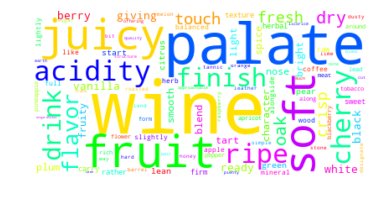

In [16]:
text = " ".join(w for w in upd_stripped)
wordcloud = WordCloud(max_words=100, collocations=False, stopwords=stop_words, background_color="white", colormap="gist_rainbow").generate(text)



plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()